In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("../dataset/fb_comment_predicted.tsv",sep='\t',encoding='utf-8')

In [131]:
df['commenter_name'].unique()
df[df['service']==True] = 'TRUE'
#df = df[df['service'].apply(lambda x:len(x)>0)]
df['created_date_format'] = df['created_time'].apply(lambda x: str(x)[:10])
df['service'].value_counts()

DTAC    59276
AIS     55663
TRUE    47675
Name: service, dtype: int64

In [132]:
df.head()

,Unnamed: 0,Unnamed: 0.1,level_0,index,commenter_id,commenter_name,created_time,like_count,message,score_0,...,service,token,scoredAmt,token_arr,Irrelevant,Negative,Neutral,Positive,class,created_date_format
0,0,0,0,0,1.02054e+16,Nui Worabut,2016-06-01 12:53:00,1,ใช้โปรเสริม net non..9 gb ใช้หมดลดความเร็วไม่...,NaN,...,DTAC,"['ใช้', 'โปรเสริม', ' ', 'net', ' ', 'non', '....",0,"['ใช้', 'โปรเสริม', ' ', 'net', ' ', 'non', '....",2.68438e-35,1,9.33896e-17,8.56704e-15,Negative,2016-06-01
1,1,1,1,1,9.39589e+14,Chandratithaya Je-u,2016-06-02 17:17:32,0,ใช้ดีแทค แล้วปวดใจจริงๆ สัญญานขาดหาย อินเตอร์เ...,NaN,...,DTAC,"['ใช้', 'ดี', 'แทค', ' ', 'แล้ว', 'ปวดใจ', 'จร...",0,"['ใช้', 'ดี', 'แทค', ' ', 'แล้ว', 'ปวดใจ', 'จร...",0,1,2.76012e-37,0,Negative,2016-06-02
2,2,2,2,2,6.3853e+14,Hataichanok Maklamai,2016-06-02 07:51:45,0,ส่งขอมูลไปทาง ib แล้วนะคะ รบกวนตอบด้วยคะ ส่งไป...,NaN,...,DTAC,"['ส่ง', 'ขอมูล', 'ไป', 'ทาง', ' ', 'ib', ' ', ...",0,"['ส่ง', 'ขอมูล', 'ไป', 'ทาง', ' ', 'ib', ' ', ...",2.19241e-31,1,2.37428e-08,2.9605e-37,Negative,2016-06-02
3,3,3,3,3,4.78317e+14,Nattapong Wongsa,2016-06-02 15:43:53,1,อะไรนี้...ไม่เปิดให้เติมเกมส์ใช้ปะ จะได้เลิกใช้,NaN,...,DTAC,"['อะไร', 'นี้', '...', 'ไม่', 'เปิด', 'ให้', '...",0,"['อะไร', 'นี้', '...', 'ไม่', 'เปิด', 'ให้', '...",7.96124e-28,0.000268206,0.999732,2.25049e-14,Neutral,2016-06-02
4,4,4,4,4,4.98621e+14,Jitsak Sisawad,2016-06-02 15:09:06,0,ห่วยแตกไม่เคยแจ้งข่าวสารให้ลูก อยู่ๆก้มาเก็บค่...,NaN,...,DTAC,"['ห่วย', 'แตก', 'ไม่', 'เคย', 'แจ้ง', 'ข่าวสาร...",0,"['ห่วย', 'แตก', 'ไม่', 'เคย', 'แจ้ง', 'ข่าวสาร...",0,1,0,0,Negative,2016-06-02


In [176]:
df = df.sort_values('created_time')
getService = lambda x:list(x)
def getService(x):
    return list(x)
def getNumService(x):
    return len(set(list(x)))
def getPageShiftNum(z):
    curList = z[:-1]
    nextList = z[1:]
    return sum([a!=b for a,b in zip(curList,nextList)])
def getCommentCount(x):
    return len(x)
def id(x):
    return x.iloc[0]
d = {'service':[getService,getNumService, getPageShiftNum,getCommentCount],'commenter_id':id}
shift_df =  df.groupby(['commenter_name']).agg(d)

In [177]:
print("Page shift number: ")
shift_df['service']['getPageShiftNum'].value_counts()

Page shift number: 


0     86402
1      1948
2       324
3       102
4        41
5        23
6         8
14        7
9         6
7         5
11        4
10        2
15        2
30        1
16        1
18        1
23        1
34        1
Name: getPageShiftNum, dtype: int64

In [178]:
print("No shifting")
oneService = shift_df[shift_df['service']['getNumService']==1]
oneService['Service0']= oneService['service']['getService'].apply(lambda x:x[0])

No shifting


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [179]:
print("Clean shifter (2)")
twoService = shift_df[(shift_df['service']['getNumService']==2)&(shift_df['service']['getPageShiftNum']==1)]

Clean shifter (2)


In [180]:
twoService['Service0'] = twoService['service']['getService'].apply(lambda x: x[0])
twoService['Service1'] = twoService['service']['getService'].apply(lambda x: x[-1])
twoService['FromTo'] = twoService['service']['getService'].apply(lambda x: str(x[0])+"->"+str(x[-1]))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [181]:
print("One shift service")
twoService['FromTo'].value_counts().sort_index()

One shift service


AIS->DTAC     479
AIS->TRUE      92
DTAC->AIS     578
DTAC->TRUE    109
DTAC->nan       1
TRUE->AIS     326
TRUE->DTAC    363
Name: FromTo, dtype: int64

In [182]:
from  more_itertools import unique_everseen
print("Clean shifter (3)")
threeService = shift_df[(shift_df['service']['getNumService']==3)&(shift_df['service']['getPageShiftNum']==2)]
threeService['Service0'] = threeService['service']['getService'].apply(lambda x: list(unique_everseen(x))[0])
threeService['Service1'] = threeService['service']['getService'].apply(lambda x: list(unique_everseen(x))[1])
threeService['Service2'] = threeService['service']['getService'].apply(lambda x: list(unique_everseen(x))[2])
threeService['FromTo'] = threeService['service']['getService'].apply(lambda x: "->".join(list(unique_everseen(x))))

Clean shifter (3)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [183]:
print("Two shift service")
threeService['FromTo'].value_counts().sort_index()

Two shift service


AIS->DTAC->TRUE     3
AIS->TRUE->DTAC     6
DTAC->AIS->TRUE     1
DTAC->TRUE->AIS     8
TRUE->AIS->DTAC    20
TRUE->DTAC->AIS    26
Name: FromTo, dtype: int64

In [184]:
print(oneService.shape)
print(twoService.shape)
print(threeService.shape)

(86402, 6)
(1948, 8)
(64, 9)


In [185]:
clean_shifter = pd.concat([oneService,twoService,threeService])
clean_shifter.to_csv("../dataset/clean_shifter.tsv",sep='\t',encoding='utf-8')
clean_shifter.head()

FromTo Service0 Service1 Service2  \
                                                                      
commenter_name                                                        
 ผู้สาว ขาเลาะ                       NaN     DTAC      NaN      NaN   
 สวรรค์มันรก นรกมันลื่น              NaN     DTAC      NaN      NaN   
 ไอ้ผึ้ง  พัชรินทร์ แสนสุข           NaN      AIS      NaN      NaN   
'Cha Ornjiyong                       NaN      AIS      NaN      NaN   
'Leng' Suphakit Tangtrakulcharoen    NaN     DTAC      NaN      NaN   

                                  commenter_id         service                \
                                            id getCommentCount getNumService   
commenter_name                                                                 
 ผู้สาว ขาเลาะ                     5.85054e+14               2             1   
 สวรรค์มันรก นรกมันลื่น            2.06931e+14               2             1   
 ไอ้ผึ้ง  พัชรินทร์ แสนสุข         9.80172e+14               1             1   
'Cha Ornjiyong                     8.21153e+14               1             1   
'Leng' Suphakit Tangtrakulcharoen  9.46319e+14               1             1   

                                                                 
                                  getPageShiftNum    getService  
commenter_name                                                   
 ผู้สาว ขาเลาะ                                  0  [DTAC, DTAC]  
 สวรรค์มันรก นรกมันลื่น                         0  [DTAC, DTAC]  
 ไอ้ผึ้ง  พัชรินทร์ แสนสุข                      0         [AIS]  
'Cha Ornjiyong                                  0         [AIS]  
'Leng' Suphakit Tangtrakulcharoen               0        [DTAC]

ธนิด ภัทรกิตติ has 946 comments.
Sample comment : 
Comment at page: TRUE
ทรูครับ คุณนภัส แจ้งว่าทรูยูสามารถประชาสัมพันธ์โดยลูกค้าไม่ยินยอมได้ ทรูจะลงโทษคุณนภัสอย่างไร
----------------------------------
Comment at page: TRUE
ฝ่ายกฎหมายส่งเอกสารให้คณะกรรมการ กสทช.หรือยังครับ
----------------------------------
Comment at page: TRUE
5/7/59 ผมเริ่มมีอาการวิงเวียน และปวดหัวมากๆ และไปหาหมอจึงโทรแจ้ง 1331 ให้ระงับข้อความกวนใจ
19/8/59 ผมปวดหัวและนอนไม่หลับ 1 สัปดาห์ และไปหาหมอ หลังจากที่ผมได้รับข้อความกวนใจซ้ำในระหว่างส่งเรื่องตรวจสอบ
22/8/59 ผมปวดหัวและนอนไม่หลับ จึงไปหาหมอและหมอก็ฉีดยาระงับปวดให้
ทรูครับปัจจุบันคุณอรอุมาส่งเอกสารให้ฝ่ายกฏหมาย ทำเอกสารแจ้งคณะกรรมการ กสทช เสร็จหรือยังครับ
กรรมการผุ้จัดการ บ.เรียล มูฟ จก.จะช่วยเหลือลูกค้าที่ล้มป่วยอย่างไร 
กรรมการผู้จัดการ บ. เรียล มูฟ จก. จะให้มาร์เก็ตติ้งและ 1331 รับผิดชอบต่อเรื่องที่เกิดขึ้นอย่างไร
----------------------------------
Comment at page: TRUE
สวัสดีครับ ทรูมูฟ เอช ต้องขออภัยที่ไม่ได้รับความสะดวก และ เรียนแจ้งทั้ง 3 กรณีดังนี้ครับ


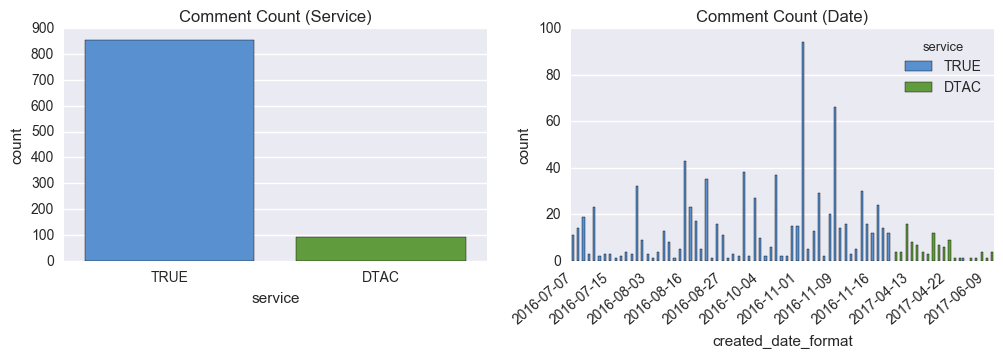

In [202]:
def commentFromUser(name):
    return df[df['commenter_name']==name]
from datetime import datetime

def analyzeUserComment(name):
    color = ['dark sky blue','grass','reddish orange']
    colors = sns.xkcd_palette(color)
    comment = commentFromUser(name)
    print("%s has %d comments."%(name,comment.shape[0]))
    print("Sample comment : ")
    fig, axs = plt.subplots(ncols=2,figsize=(12,3))
    sns.countplot(x="service", data=comment,palette=colors,ax=axs[0])
    axs[0].set_title('Comment Count (Service)')
    sns.countplot(x="created_date_format", data=comment,hue='service',palette=colors,ax=axs[1])
    #axs[1].set_xticks([])
    #axs[1].set_xticklabels([])d = ts
    dateStr = [str(i)[10:20] for i in list(axs[1].get_xticklabels())]
    if(len(dateStr)>=10):
        dateStr = [date if (i%int(len(dateStr)/10))==0  else "" for i,date in enumerate(dateStr) ]
        
    axs[1].set_xticklabels(dateStr, rotation=40, ha="right",size=10)
    axs[1].set_title('Comment Count (Date)')
    for row in comment[['message','created_date_format','service']].sample(min(7,comment.shape[0])).sort_values('created_date_format').values:
        (comment,time,service) = row
        print("Comment at page: {}".format(service))
        print(comment)
        print("----------------------------------")
    
    return 
analyzeUserComment('ธนิด ภัทรกิตติ')

Hit user: 44
นายฉัตรชัย ปณีตะผลินทร์ has 30 comments.
Sample comment : 
Comment at page: AIS
เรียนแอด ช่วยตอบกลับในอินบ๊อกของผม ด้วยคับ
----------------------------------
Comment at page: AIS
เรียน แอด ช่วยตอบกลับในอินบ๊อกของผมด้วยครับ
----------------------------------
Comment at page: AIS
เรียนแอด กรุณาตอบกลับในอินบ๊อกของผมด้วยครับ
----------------------------------
Comment at page: AIS
เรียนแอด ช่วยส่งเรื่องค่าใช้จ่าย2รายการในอินบ๊อกให้พิจารณาด่วนเรื่องเวฟค่าใช้จ่ายซึ่งไม่ได้ใช้บริการ แต่เอไอเอสมาคิดเงินจากผม เพราะดำเนินการแจ้งมากว่า2สัปดาห์แล้ว ยังไม่คืบหน้าครับ
----------------------------------
Comment at page: AIS
เรียนแอด ช่วยดำเนินการขอปรับลดยอดค่าใช้จ่าย2รายการในอินบ๊อกของผมให้ด้วย เพราะติดต่อมาเกิน2สัปดาห์แล้ว ยังไม่ตืบหน้าครับ
----------------------------------
Comment at page: AIS
like & share #AIS #AunjaiSweetTime2017
----------------------------------
Comment at page: AIS
แอด ตอบกลับในอินบ๊อกของผมด้วย ครับ
----------------------------------


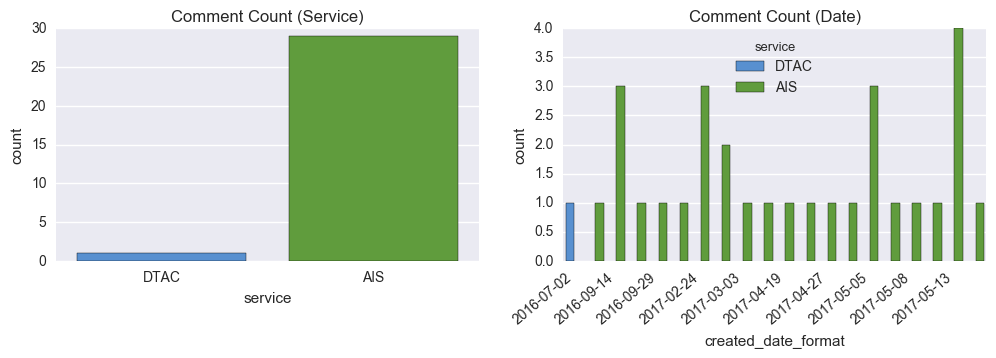

In [231]:
def sampleCleanShifterComment(minService=2,minComment=10):
    moreService = clean_shifter['service']['getNumService']>=minService
    moreComment = clean_shifter['service']['getCommentCount']>=minComment
    allCond = moreService & moreComment
    selectedCondition = clean_shifter[allCond]
    print("Hit user: "+str(selectedCondition.shape[0]))
    randomName = selectedCondition.reset_index()['commenter_name'].sample(1).values[0]
    analyzeUserComment(randomName)
sampleCleanShifterComment()

Hit user: 8
Pom Rakitsara has 29 comments.
Sample comment : 
Comment at page: AIS
ข้าพเจ้าใช้เบอร์ 0877454593  ซึ่งมีย้ายค่ายจาก Dtac มา AIS เพราะเห็นว่าแพ็จเก็จคุ้มค่า ซึ่งก็ได้ข้อมูลว่า ได้ใช้ Multisim ฟรี 1 ใบ แต่ปรากฎว่า ค่าบริการรอบบิลล่าสุด มีการเรียกเก็บเงินค่า Multisim มา และข้าพเจ้าได้มีการโทรสอบถามทาง 1175(คุณดุสิต) ได้มีการโทรมาแจ้งข้าพเจ้าแล้วว่า ที่ฟรีเฉพาะค่าซิมเท่านั้น ส่วนค่าบริการรายเดือนเดือนละ 20 บาท ไม่ฟรี  ทาง AIS ทำไมไม่ระบุให้ชัดเจน และเมื่อตอนที่ข้าพเจ้าไปทำ Multisim ที่ AIS สาขาโรบินสันศรีราชา ไม่มีเจ้าหน้าที่ท่านใดแจ้งเลยว่าเสียค่าบริการรายเดือนอีกเดือนละ 20 บาท  วันนี้ (4/12/2559) ข้าพเจ้าได้ไปยกเลิกเบอร์ที่ AIS สาขาโรบินสันศรีราชา ใช้บริการ Counter ที่2  แทนที่พนักงานจะหาหกทางแก้ไขให้ หรือแนะนำหรือปรึกษาหัวหน้า  กลับให้ข้าพเจ้ายกเลิกเบอร์เฉยเลย และเปลี่ยนเป็นระบบเติมเงินให้  ที่เจ็บปวดกว่านั้น พนักงานแจ้งว่า การยกเลิกระหว่างรอบบิล จะคิดค่่าบริการเต็มรอบบิล ไม่ได้คิดเฉลี่ยต่อวัน  นี่มันโกงกันและเอาเปรียบกันชัดๆ พนักงานแจ้งว่าให้มายกเลิกอีกครั้ง ในวันที่ใกล้ๆต

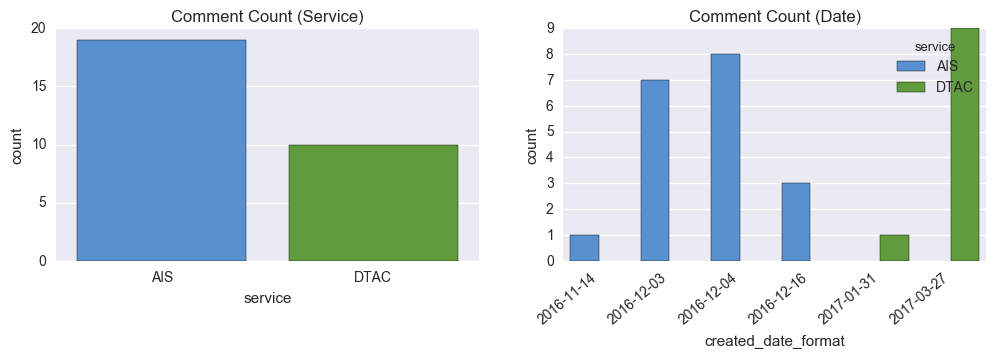

In [243]:
sampleCleanShifterComment(minService=2,minComment=25)

In [221]:
for comment in df['message'][(df['commenter_name']=='Kittithat Tri') & (df['class']=='Positive')].values:
    print(comment)
    print("---------")

อย่าซื้อเครื่องหรือรับเครื่องจากais  เพราะจะพบกับนรกบนดิน. อย่างไอโฟนจะไม่รับเค้าบอกซื้อจากไหนเคมที่นั่นถ้าค่ายโทรศัพท์เพราะพวกนี้เอาเครื่องมาจัดทำโปรไอสตูดิโอ้ กับพวกร้ายแอปเปิ้ลไม่รับส่งผ่านช็อบครับ เดินออกจากร้าน10นาทีเครื่องรวนส่งซ่อม. ที่อื่นเปลี่ยนใหม่
---------
ซื้อไม่แพงกว่าถ้าโดนเอาเปรียบด้านโปร. นรกมีจริง. เพราะais ดีแต่ปาก. 
พวกคุณรู้มั้ย. Ture  dtac   ใช้เครือข่ายตัวเองโทรเข้าที่1331  1678  คิดเป็นครั้งครั้งละ3. บาท.  แต่ais  โทรเข้า1175. คิดเป็นนาทีครับ. สำหรับคนไม่รู้เพราะทางais. จะมีการดึงเวลาให้พอสมควรถึงตอบคำถาม. คือคิดยอดเงินจากโปร. เช่นใครโทรฟรี. 100 นาที โทรเข้า 1175. 50. นา ทั. เหลือเวลา โปร. 50. นาที. ส่วนเติมเงินหักจากยอดเงินครับถ้านาทีแรก 2 บาท นาทีต่อไป 1 บาท. ก็จะโดน. 51  บาทไม่รวมvat ครับ
---------
อยากเล่นเกมมั้ยครับ. Ais  ตอบกลับมาแต่. Inbox  สนใจมั้ยครับ
---------
ตอนซื้อก็ง่าย ตอนเคมโครตยากเลย ซื้อที่ไหนก็ได้. แต่เคมเฉพาะที่
---------
ใครรู้จัก  sim 2 fly  มั่งครับ. เป็นซิมทีาสามารถไปใช้ต่างประเทศได้เลย. แต่ถ้าซิมหาย. ไปทำใหม่. เอาไปใช้คนละโปร. ทาง  AIS. 

In [240]:
interestingCommetnerName = [
    'Kittithat Tri',
    'Pom Rakitsara',
    'Prayoon Lertkamolmal'
]